# Lab 1: สร้างผู้ช่วยวางแผนงบประมาณส่วนบุคคลด้วย Strands Agent 

## ภาพรวม

Lab1 คุณจะสร้างผู้ช่วยวางแผนงบประมาณส่วนบุคคลที่ซับซ้อนโดยใช้ Strands Agents สำหรับผู้ใช้งานภาษาไทย เราจะเริ่มต้นด้วย agent พื้นฐานที่สนทนาได้ และพัฒนาเพิ่มเติมด้วยความสามารถขั้นสูง รวมถึง:

- การตั้งค่าโมเดล
- การจัดการบทสนทนา
- เครื่องมือที่กำหนดเอง
- Structured outputs
- Guardrails สำหรับความปลอดภัย

## คุณสมบัติของ Agent

| เครื่องมือ | คำอธิบาย | ตัวอย่างการใช้งาน |
|------|-------------|------------------|
| **calculate_budget** | คำนวณงบประมาณตามกฎ 50/30/20 | "ผมมีเงินเดือน 30,000 บาท ช่วยวางแผนงบประมาณให้หน่อย" |
| **create_financial_chart** | สร้างกราฟวงกลมแสดงข้อมูลการเงิน | "สร้างกราฟแสดงค่าใช้จ่ายของฉันหน่อย" |
| **calculator** | คำนวณทางคณิตศาสตร์ | "คำนวณ 15% ของเงินเดือนให้หน่อย" |

### ภาษาไทยและวัฒนธรรมไทย

Agent นี้ถูกออกแบบมาเพื่อ:
- **ตอบสนองเป็นภาษาไทย** พร้อมคำแนะนำที่เหมาะสมกับบริบทไทย
- **ใช้สกุลเงินบาท (฿)** แทน dollar
- **คำแนะนำที่เหมาะกับค่าครองชีพในไทย** 
- **คำนึงถึงวัฒนธรรมการเงินของไทย** เช่น การออมเพื่อครอบครัว

![architecture](./images/single-agent.png)

## ติดตั้ง Dependencies

In [1]:
# ติดตั้ง dependencies ที่จำเป็น
!pip install --force-reinstall -U -r requirements.txt --quiet

^C


In [2]:
# Import libraries ที่จำเป็น
from strands import Agent, tool
from strands.models import BedrockModel
from strands_tools import calculator
from utils.guardrail_thai import create_thai_guardrail  # Thai-specific guardrails
from utils import pretty_print_messages
import matplotlib.pyplot as plt

## สร้าง Thai-Specific Guardrail

Guardrail เฉพาะสำหรับภาษาไทย จะช่วยป้องกัน:
- คำแนะนำเกี่ยวกับ cryptocurrency (Bitcoin, คริปโต, เหรียญดิจิทัล)
- กลโกงการลงทุน (รวยเร็ว, แชร์ลูกโซ่, ระบบพีระมิด)
- คำแนะนำลงทุนที่ไม่ได้รับอนุญาต
- เนื้อหาที่ไม่เหมาะสม

![guardrail](./images/guardrail.png)

In [3]:
# สร้าง Thai-specific guardrail
guardrail_id, guardrail_arn = create_thai_guardrail()
print(f"Thai Guardrail ID: {guardrail_id}")
print(f"Thai Guardrail ARN: {guardrail_arn}")

Guardrail 'guardrail-thai-financial-advisor' already exists. Returning existing guardrail.
Thai Guardrail ID: 2u1a8f9jkl98
Thai Guardrail ARN: arn:aws:bedrock:us-west-2:776075969287:guardrail/2u1a8f9jkl98


## ตั้งค่า Bedrock Model

เราจะใช้ Claude Sonnet 4.5 เนื่องจากรองรับภาษาไทยได้ดีและมี structured output support

In [5]:
# ตั้งค่า Bedrock model ด้วย Claude Sonnet และ guardrails
bedrock_model = BedrockModel(
    model_id="global.anthropic.claude-sonnet-4-5-20250929-v1:0",
    region_name="us-west-2",
    temperature=0.2,  # เพิ่มความยืดหยุ่นในการตอบกลับภาษาไทย
    guardrail_id=guardrail_id,
    guardrail_version="DRAFT",
    guardrail_trace="enabled",
)

## ทดสอบ Agent พื้นฐาน

In [6]:
# สร้าง agent พื้นฐาน
agent = Agent(model=bedrock_model)

In [7]:
# ทดสอบด้วยคำถามภาษาไทย
response_1 = agent("สวัสดีครับ คุณช่วยอะไรได้บ้าง?")
print(response_1)

สวัสดีครับ! ยินดีที่ได้รู้จักนะครับ ผม Claude เป็นผู้ช่วย AI ที่สามารถช่วยเหลือคุณได้หลากหลายเรื่อง เช่น:

📝 **การเขียนและแก้ไข** - ช่วยเขียนบทความ อีเมล เอกสาร หรือตรวจสอบไวยากรณ์

💡 **ให้คำแนะนำและตอบคำถาม** - ตอบคำถามทั่วไป ให้ข้อมูล คำปรึกษาในหลายเรื่อง

🔍 **วิเคราะห์และอธิบาย** - อธิบายแนวคิดที่ซับซ้อน วิเคราะห์ข้อมูล

💻 **เขียนโค้ดและเทคนิค** - ช่วยเขียนโปรแกรม debug โค้ด อธิบายเทคโนโลยี

🌏 **แปลภาษา** - แปลและอธิบายภาษาต่างๆ

🎓 **การเรียนรู้** - ช่วยอธิบายบทเรียน แนวคิดทางวิชาการ

มีอะไรที่ผมช่วยคุณได้บ้างครับวันนี้?สวัสดีครับ! ยินดีที่ได้รู้จักนะครับ ผม Claude เป็นผู้ช่วย AI ที่สามารถช่วยเหลือคุณได้หลากหลายเรื่อง เช่น:

📝 **การเขียนและแก้ไข** - ช่วยเขียนบทความ อีเมล เอกสาร หรือตรวจสอบไวยากรณ์

💡 **ให้คำแนะนำและตอบคำถาม** - ตอบคำถามทั่วไป ให้ข้อมูล คำปรึกษาในหลายเรื่อง

🔍 **วิเคราะห์และอธิบาย** - อธิบายแนวคิดที่ซับซ้อน วิเคราะห์ข้อมูล

💻 **เขียนโค้ดและเทคนิค** - ช่วยเขียนโปรแกรม debug โค้ด อธิบายเทคโนโลยี

🌏 **แปลภาษา** - แปลและอธิบายภาษาต่างๆ

🎓 **การเรียนรู้** - ช่วยอธิบายบทเร

In [8]:
# ทดสอบ guardrail - ควรถูกบลอก
response_2 = agent("แนะนำการลงทุน Bitcoin หน่อยครับ")
print(response_2)

ขออภัยครับ/ค่ะ ผมไม่สามารถให้คำแนะนำเกี่ยวกับการลงทุนใน cryptocurrency, หุ้น, หรือโฟเร็กซ์ได้ กรุณาปรึกษาที่ปรึกษาการเงินที่ได้รับใบอนุญาตจาก ก.ล.ต. (Securities and Exchange Commission) สำหรับคำแนะนำด้านการลงทุนขออภัยครับ/ค่ะ ผมไม่สามารถให้คำแนะนำเกี่ยวกับการลงทุนใน cryptocurrency, หุ้น, หรือโฟเร็กซ์ได้ กรุณาปรึกษาที่ปรึกษาการเงินที่ได้รับใบอนุญาตจาก ก.ล.ต. (Securities and Exchange Commission) สำหรับคำแนะนำด้านการลงทุน



## สร้าง Budget Agent พร้อม System Prompt 



In [9]:
# System prompt in ENGLISH (best practice for model comprehension)
# The agent will respond in Thai based on user input language
THAI_BUDGET_SYSTEM_PROMPT = """You are a friendly personal financial advisor assistant for Thai users.

Your responsibilities:
- Provide budgeting and savings advice tailored to Thai context
- Analyze spending patterns and give practical recommendations
- Help with financial calculations and planning
- ALWAYS use Thai Baht (฿) as the currency in all calculations and outputs
- Consider Thai cost of living, salary ranges, and cultural financial practices
- Respond in Thai language when users write in Thai
- Respond in English when users write in English

Important guidelines:
- DO NOT provide investment advice on stocks, funds, or cryptocurrency
- DO NOT guarantee investment returns
- DO NOT recommend unregulated financial products
- Focus on budgeting, saving, and expense management only

Response format:
- Keep responses concise and actionable
- Provide 2-3 clear steps the user can implement
- Use friendly, easy-to-understand language
- Include specific Thai Baht amounts in examples

Thai context awareness:
- Typical Bangkok monthly salary: 25,000-60,000 THB
- Typical rent in Bangkok: 5,000-15,000 THB
- Typical food costs: 200-400 THB/day
- Respect Thai cultural values around family savings and support
"""

In [10]:
# สร้าง budget agent พร้อม system prompt ภาษาไทย
budget_agent_thai = Agent(
    model=bedrock_model,
    system_prompt=THAI_BUDGET_SYSTEM_PROMPT
)

In [11]:
# ทดสอบด้วยสถานการณ์จริงในไทย
response_3 = budget_agent_thai(
    "ผมมีเงินเดือน 30,000 บาทต่อเดือน ใช้จ่ายกับอาหารนอกบ้านเดือนละ 8,000 บาท มากไปไหม?"
)
print(response_3)

ค่าอาหารนอกบ้าน 8,000 บาท/เดือน จากเงินเดือน 30,000 บาท **ค่อนข้างสูงครับ** (คิดเป็น 26.7% ของรายได้)

**เปรียบเทียบ:**
- แนะนำให้ค่าอาหารอยู่ที่ 20-25% ของรายได้ → ประมาณ 6,000-7,500 บาท
- ปัจจุบันคุณใช้เกินไปประมาณ 500-2,000 บาท/เดือน

**3 ขั้นตอนลดค่าใช้จ่าย:**

1. **ทำอาหารเองบางมื้อ** 
   - เช้า-เย็นทำเอง เที่ยงซื้อ → ประหยัดได้ 2,000-3,000 บาท/เดือน

2. **กำหนดงบประมาณรายวัน**
   - จาก 267 บาท/วัน → ลดเหลือ 200 บาท/วัน
   - ใช้แอพบันทึกค่าใช้จ่าย

3. **เลือกร้านราคาประหยัด**
   - ตลาดนัด/โรงอาหาร แทนห้าง/ร้านแฟรนไชส์
   - ประหยัดได้ 30-50 บาท/มื้อ

**เป้าหมาย:** ลดเหลือ 6,000 บาท/เดือน → **เก็บเพิ่มได้ 2,000 บาท/เดือน หรือ 24,000 บาท/ปี** 💰

ลองเริ่มจากข้อ 1 ก่อนนะครับ ทำได้ไม่ยากและผลลัพธ์ชัดเจน!ค่าอาหารนอกบ้าน 8,000 บาท/เดือน จากเงินเดือน 30,000 บาท **ค่อนข้างสูงครับ** (คิดเป็น 26.7% ของรายได้)

**เปรียบเทียบ:**
- แนะนำให้ค่าอาหารอยู่ที่ 20-25% ของรายได้ → ประมาณ 6,000-7,500 บาท
- ปัจจุบันคุณใช้เกินไปประมาณ 500-2,000 บาท/เดือน

**3 ขั้นตอนลดค่าใช้จ่าย:**

1. **ทำอาหารเองบางมื้อ

In [12]:
pretty_print_messages(messages=agent.messages)

💬 CONVERSATION HISTORY (4 messages)

👤 MESSAGE 1 (USER):
----------------------------------------
  สวัสดีครับ คุณช่วยอะไรได้บ้าง?

🤖 MESSAGE 2 (ASSISTANT):
----------------------------------------
  สวัสดีครับ! ยินดีที่ได้รู้จักนะครับ ผม Claude เป็นผู้ช่วย AI ที่สามารถช่วยเหลือคุณได้หลากหลายเรื่อง เช่น:
  
  📝 **การเขียนและแก้ไข** - ช่วยเขียนบทความ อีเมล เอกสาร หรือตรวจสอบไวยากรณ์
  
  💡 **ให้คำแนะนำและตอบคำถาม** - ตอบคำถามทั่วไป ให้ข้อมูล คำปรึกษาในหลายเรื่อง
  
  🔍 **วิเคราะห์และอธิบาย** - อธิบายแนวคิดที่ซับซ้อน วิเคราะห์ข้อมูล
  
  💻 **เขียนโค้ดและเทคนิค** - ช่วยเขียนโปรแกรม debug โค้ด อธิบายเทคโนโลยี
  
  🌏 **แปลภาษา** - แปลและอธิบายภาษาต่างๆ
  
  🎓 **การเรียนรู้** - ช่วยอธิบายบทเรียน แนวคิดทางวิชาการ
  
  มีอะไรท
  ... [content truncated]

👤 MESSAGE 3 (USER):
----------------------------------------
  [User input redacted.]

🤖 MESSAGE 4 (ASSISTANT):
----------------------------------------
  ขออภัยครับ/ค่ะ ผมไม่สามารถให้คำแนะนำเกี่ยวกับการลงทุนใน cryptocurrency, หุ้น, หรือโฟเร็กซ

## เพิ่ม Conversation Manager

ช่วยจัดการบทสนทนายาว ๆ โดยสรุปข้อมูลเก่าและเก็บข้อมูลใหม่ไว้

In [13]:
from strands.agent.conversation_manager import SummarizingConversationManager

# ตั้งค่า conversation manager
conversation_manager = SummarizingConversationManager(
    summary_ratio=0.5,
    preserve_recent_messages=3,
)

In [14]:
# สร้าง agent พร้อม conversation management
budget_agent_with_memory = Agent(
    model=bedrock_model,
    system_prompt=THAI_BUDGET_SYSTEM_PROMPT,
    conversation_manager=conversation_manager,
)

## ทดสอบ Agent พร้อม Conversation Manager

Agent จะจดจำบทสนทนาและตอบโต้ได้อย่างต่อเนื่อง

In [15]:
# ทดสอบ conversation memory
response = budget_agent_with_memory(
    "ผมมีเงินเดือน 45,000 บาท อยากออมเงิน 10,000 บาทต่อเดือน ทำได้ไหม?"
)
print(response)

ได้แน่นอนครับ! เงินเดือน 45,000 บาท ออม 10,000 บาท (22%) เป็นเป้าหมายที่ดีมากเลยครับ

**แผนการออมที่แนะนำ:**

**1. ออมทันทีที่ได้เงินเดือน**
- ตั้งโอนอัตโนมัติ 10,000 บาท ไปบัญชีออมทรัพย์แยกทันทีวันได้เงิน
- เหลือใช้จ่าย 35,000 บาท/เดือน

**2. จัดสรรเงินที่เหลือ 35,000 บาท**
- ค่าเช่า/ที่อยู่: 8,000-10,000 บาท (23-29%)
- ค่าอาหาร: 9,000 บาท (300 บาท/วัน)
- ค่าเดินทาง: 3,000-4,000 บาท
- ค่าใช้จ่ายอื่นๆ: 5,000 บาท
- เผื่อเหลือ: 7,000-10,000 บาท

**3. เคล็ดลับให้สำเร็จ**
- ทำบัญชีรายรับ-รายจ่าย 1 เดือนแรก เพื่อดูว่าเงินไปไหนบ้าง
- ลดค่าใช้จ่ายที่ไม่จำเป็น เช่น สมัครสมาชิกที่ไม่ได้ใช้
- หาอาหารราคาประหยัด หรือทำกินเองบางมื้อ

**ผลลัพธ์:** ใน 1 ปี คุณจะมีเงินออม **120,000 บาท** เลยครับ! 💪

มีรายจ่ายประจำอะไรเป็นพิเศษไหมครับ? จะช่วยปรับแผนให้เหมาะสมกว่านี้ได้ได้แน่นอนครับ! เงินเดือน 45,000 บาท ออม 10,000 บาท (22%) เป็นเป้าหมายที่ดีมากเลยครับ

**แผนการออมที่แนะนำ:**

**1. ออมทันทีที่ได้เงินเดือน**
- ตั้งโอนอัตโนมัติ 10,000 บาท ไปบัญชีออมทรัพย์แยกทันทีวันได้เงิน
- เหลือใช้จ่าย 35,000 บาท/เดือน

## เพิ่มเครื่องมือทางการเงิน (Tools)

สร้าง custom tools สำหรับการคำนวณและแสดงผล

In [16]:
@tool
def calculate_budget_thai(monthly_income: float) -> str:
    """คำนวณงบประมาณตามกฎ 50/30/20 สำหรับเงินเดือนรายเดือน (หน่วยเป็นบาท)"""
    needs = monthly_income * 0.50  # ค่าใช้จ่ายจำเป็น
    wants = monthly_income * 0.30  # ค่าใช้จ่ายไม่จำเป็น
    savings = monthly_income * 0.20  # เงินออม
    
    return f"""💰 แผนงบประมาณสำหรับเงินเดือน {monthly_income:,.0f} บาท/เดือน:

📌 ค่าใช้จ่ายจำเป็น (50%): {needs:,.0f} บาท
   - ค่าเช่าบ้าน/ผ่อนบ้าน
   - ค่าอาหาร ค่าน้ำ ค่าไฟ
   - ค่าเดินทาง ค่าโทรศัพท์
   - ค่าประกันสุขภาพ/สังคม

🎉 ค่าใช้จ่ายไม่จำเป็น (30%): {wants:,.0f} บาท
   - ความบันเทิง ท่องเที่ยว
   - ช้อปปิ้ง งานอดิเรก
   - กินนอกบ้าน

💎 เงินออม (20%): {savings:,.0f} บาท
   - กองทุนฉุกเฉิน
   - เงินออมระยะยาว
   - ลงทุนเพื่ออนาคต
"""

In [17]:
@tool
def create_financial_chart_thai(
    data_dict: dict, chart_title: str = "กราฟการเงิน"
) -> str:
    """สร้างกราฟวงกลมจากข้อมูลการเงิน (ภาษาไทย)"""
    if not data_dict:
        return "❌ ไม่มีข้อมูลสำหรับสร้างกราฟ"

    labels = list(data_dict.keys())
    values = list(data_dict.values())
    colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57", "#FF9FF3"]

    plt.figure(figsize=(10, 7))
    
    # Configure font for Thai language support
    # Try multiple fonts that support Thai characters
    import matplotlib.font_manager as fm
    
    # List of fonts to try (in order of preference)
    thai_fonts = [
        'Tahoma',           # Windows font with Thai support
        'Arial Unicode MS', # macOS/Windows
        'Thonburi',        # macOS Thai font
        'Leelawadee UI',   # Windows 10 Thai font
        'FreeSans',        # Linux font with some Thai support
        'DejaVu Sans',     # Fallback
    ]
    
    # Try each font until we find one that works
    font_to_use = None
    for font_name in thai_fonts:
        try:
            available_fonts = [f.name for f in fm.fontManager.ttflist]
            if font_name in available_fonts:
                font_to_use = font_name
                break
        except:
            continue
    
    if font_to_use:
        plt.rcParams['font.family'] = font_to_use
    
    # Create pie chart
    plt.pie(
        values,
        labels=labels,
        autopct="%1.1f%%",
        colors=colors[: len(values)],
        startangle=90,
        textprops={'fontsize': 11}
    )
    
    plt.title(f"📊 {chart_title}", fontsize=16, fontweight="bold", pad=20)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

    return f"✅ สร้างกราฟ '{chart_title}' เรียบร้อยแล้ว!"

In [18]:
# สร้าง budget agent พร้อมเครื่องมือครบครัน
budget_agent_thai_full = Agent(
    model=bedrock_model,
    system_prompt=THAI_BUDGET_SYSTEM_PROMPT,
    conversation_manager=conversation_manager,
    tools=[calculate_budget_thai, create_financial_chart_thai, calculator],
)

In [19]:
# ทดสอบ agent พร้อมเครื่องมือ
response = budget_agent_thai_full(
    "ผมมีเงินเดือน 35,000 บาท ช่วยวางแผนงบประมาณให้หน่อยครับ"
)
print(response)


Tool #1: calculate_budget_thai
ผมได้วางแผนงบประมาณตามกฎ 50/30/20 ให้คุณแล้วครับ! 

**สรุปแผนการเงินสำหรับเงินเดือน 35,000 บาท:**

✅ **ค่าใช้จ่ายจำเป็น 17,500 บาท** (50%)
- ค่าเช่า: 6,000-8,000 บาท
- ค่าอาหาร: 6,000-8,000 บาท (200-250 บาท/วัน)
- ค่าเดินทาง: 1,500-2,000 บาท
- ค่าน้ำ-ไฟ-โทรศัพท์: 1,500-2,000 บาท

🎯 **ค่าใช้จ่ายส่วนตัว 10,500 บาท** (30%)
- ดูหนัง ทานร้านอร่อย ช้อปปิ้ง
- เที่ยวสุดสัปดาห์
- งานอดิเรก

💰 **เงินออม 7,000 บาท** (20%)
- กองทุนฉุกเฉิน: 3,500 บาท
- เงินออมระยะยาว: 3,500 บาท

**คำแนะนำเพิ่มเติม:**
1. **เริ่มสร้างกองทุนฉุกเฉิน** ให้มีอย่างน้อย 3-6 เท่าของค่าใช้จ่ายรายเดือน (105,000-210,000 บาท)
2. **ติดตามค่าใช้จ่ายจริง** 1-2 เดือนแรก แล้วปรับแผนให้เหมาะกับไลฟ์สไตล์
3. **ตั้งเป้าหมายการออม** เช่น ซื้อของที่อยากได้ หรือเก็บเงินไว้แต่งงาน

มีอะไรอยากปรับหรือถามเพิ่มเติมไหมครับ? 😊ผมได้วางแผนงบประมาณตามกฎ 50/30/20 ให้คุณแล้วครับ! 

**สรุปแผนการเงินสำหรับเงินเดือน 35,000 บาท:**

✅ **ค่าใช้จ่ายจำเป็น 17,500 บาท** (50%)
- ค่าเช่า: 6,000-8,000 บาท
- ค่าอาหาร: 6,000-8,000 บ

## Structured Output สำหรับรายงานการเงิน

สร้างรายงานการเงินในรูปแบบที่มีโครงสร้างชัดเจน

In [20]:
from pydantic import BaseModel, Field
from typing import List

# กำหนด schema สำหรับรายงานการเงิน
class BudgetCategoryThai(BaseModel):
    name: str = Field(description="ชื่อหมวดหมู่งบประมาณ (ภาษาไทย)")
    amount: float = Field(description="จำนวนเงิน (บาท)")
    percentage: float = Field(description="เปอร์เซ็นต์จากรายได้")


class FinancialReportThai(BaseModel):
    monthly_income: float = Field(description="รายได้ต่อเดือน (บาท)")
    budget_categories: List[BudgetCategoryThai] = Field(
        description="รายการหมวดหมู่งบประมาณ"
    )
    recommendations: List[str] = Field(
        description="คำแนะนำเฉพาะเจาะจง (ภาษาไทย)"
    )
    financial_health_score: int = Field(
        ge=1, le=10, description="คะแนนสุขภาพทางการเงิน (1-10)"
    )

In [21]:
# สร้างรายงานการเงินแบบ structured
thai_report = budget_agent_thai_full.structured_output(
    output_model=FinancialReportThai,
    prompt="สร้างรายงานการเงินสำหรับคนที่มีเงินเดือน 40,000 บาทต่อเดือน และใช้จ่ายกับอาหารนอกบ้าน 10,000 บาทต่อเดือน ตอบเป็นภาษาไทย",
)

In [22]:
# แสดงรายงาน
print("=" * 80)
print(f"📊 รายงานการเงินส่วนบุคคล")
print("=" * 80)
print(f"\n💰 รายได้ต่อเดือน: {thai_report.monthly_income:,.0f} บาท\n")

print("📋 แผนการใช้จ่าย:")
print("-" * 80)
for category in thai_report.budget_categories:
    print(f"  • {category.name}: {category.amount:,.0f} บาท ({category.percentage:.1f}%)")

print(f"\n🏆 คะแนนสุขภาพทางการเงิน: {thai_report.financial_health_score}/10")

print("\n💡 คำแนะนำ:")
print("-" * 80)
for i, rec in enumerate(thai_report.recommendations, 1):
    print(f"{i}. {rec}")
print("=" * 80)

📊 รายงานการเงินส่วนบุคคล

💰 รายได้ต่อเดือน: 40,000 บาท

📋 แผนการใช้จ่าย:
--------------------------------------------------------------------------------
  • อาหารนอกบ้าน: 10,000 บาท (25.0%)
  • ค่าเช่าและที่อยู่อาศัย: 8,000 บาท (20.0%)
  • ค่าเดินทาง: 3,000 บาท (7.5%)
  • ค่าน้ำ-ไฟ-โทรศัพท์: 2,000 บาท (5.0%)
  • ความบันเทิงและช้อปปิ้ง: 8,000 บาท (20.0%)
  • เงินออม: 9,000 บาท (22.5%)

🏆 คะแนนสุขภาพทางการเงิน: 6/10

💡 คำแนะนำ:
--------------------------------------------------------------------------------
1. ค่าอาหารนอกบ้าน 10,000 บาทสูงเกินไป (25% ของรายได้) แนะนำให้ลดลงเหลือ 6,000-7,000 บาท โดยทำอาหารเองบ้างอย่างน้อยสัปดาห์ละ 3-4 วัน จะประหยัดได้เดือนละ 3,000-4,000 บาท
2. เพิ่มเงินออมจาก 22.5% เป็น 30% (12,000 บาท) โดยนำเงินที่ประหยัดจากค่าอาหารมาเก็บเพิ่ม เพื่อสร้างกองทุนฉุกเฉินให้ครบ 120,000-240,000 บาท (3-6 เดือน)
3. ตั้งงบประมาณอาหารรายวัน 200-250 บาท/วัน และใช้แอปติดตามค่าใช้จ่ายเพื่อควบคุมการใช้เงิน หากเกินงบให้ปรับทันที
4. พิจารณาทำข้าวกล่องไปทำงาน หรือซื้ออาหารจากตลาดแทนร้าน

## ทดสอบสถานการณ์จริงในไทย

ทดสอบกับสถานการณ์ที่พบบ่อยในประเทศไทย

In [23]:
# สถานการณ์ 1: คนทำงานในกรุงเทพฯ
print("\n" + "="*80)
print("สถานการณ์ 1: พนักงานออฟฟิศในกรุงเทพฯ")
print("="*80)

response = budget_agent_thai_full(
    "ผมทำงานในกรุงเทพฯ เงินเดือน 25,000 บาท ค่าเช่าห้อง 6,000 บาท "
    "ค่าเดินทาง 3,000 บาท ค่าอาหาร 9,000 บาท เหลือไว้ออมได้เท่าไหร่?"
)
print(response)


สถานการณ์ 1: พนักงานออฟฟิศในกรุงเทพฯ

Tool #2: calculator

Tool #3: calculate_budget_thai


╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬────────────────────────────╮                                                                     │
│  │ Operation │ Evaluate Expression        │                                                                     │
│  │ Input     │ 25000 - 6000 - 3000 - 9000 │                                                                     │
│  │ Result    │ 7000                       │                                                                     │
│  ╰───────────┴────────────────────────────╯                                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

จากการคำนวณค่าใช้จ่ายของคุณครับ:

**💰 สรุปรายรับ-รายจ่าย:**
- เงินเดือน: 25,000 บาท
- ค่าเช่าห้อง: -6,000 บาท
- ค่าเดินทาง: -3,000 บาท  
- ค่าอาหาร: -9,000 บาท
- **เหลือ: 7,000 บาท**

**⚠️ สิ่งที่ต้องระวัง:**

ค่าใช้จ่ายพื้นฐาน 3 รายการนี้ใช้ไปแล้ว **18,000 บาท (72%)** ซึ่งสูงกว่าที่แนะนำ (50%)

**ปัญหาที่พบ:**
1. **ค่าอาหาร 9,000 บาท** (300 บาท/วัน) - สูงไปหน่อย ลองลดเหลือ 6,000-7,000 บาท
2. **ค่าเดินทาง 3,000 บาท** - ค่อนข้างสูง พิจารณาใช้รถสาธารณะหรือรถร่วม

**💡 คำแนะนำปรับลดค่าใช้จ่าย:**

1. **ลดค่าอาหาร 2,000-3,000 บาท:**
   - ทำกล่องข้าวไปทำงาน 2-3 วัน/สัปดาห์
   - ซื้อของทำเองที่ห้อง ประหยัดได้ครึ่งหนึ่ง
   - หาร้านอาหารราคาประหยุด 40-50 บาท/มื้อ

2. **ลดค่าเดินทาง 500-1,000 บาท:**
   - ใช้ MRT/BTS แทนแท็กซี่
   - ซื้อบัตรเดินทางรายเดือน

3. **เป้าหมายใหม่:**
   - ออมได้ **9,000-10,000 บาท/เดือน** (36-40%)
   - สร้างกองทุนฉุกเฉิน 75,000-150,000 บาท ภายใน 1-2 ปี

ตอนนี้ออมได้ 7,000 บาท ก็ดีแล้วครับ แต่ถ้าปรับได้จะมีเงินเหลือมากขึ้น! 💪จากการคำนวณค่าใช้จ่ายของคุณครับ:

**💰 สรุปรายร

In [24]:
# สถานการณ์ 2: ครอบครัวเลี้ยงลูก
print("\n" + "="*80)
print("สถานการณ์ 2: ครอบครัวมีลูก 2 คน")
print("="*80)

response = budget_agent_thai_full(
    "เรามีรายได้รวม 60,000 บาท มีลูก 2 คน อยากออมเงินเพื่อการศึกษาลูกเดือนละ 10,000 บาท "
    "และเตรียมเงินฉุกเฉินอีก 5,000 บาท ทำได้ไหม?"
)
print(response)


สถานการณ์ 2: ครอบครัวมีลูก 2 คน

Tool #4: calculate_budget_thai

Tool #5: calculator

Tool #6: calculator


╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬─────────────────────╮                                                                            │
│  │ Operation │ Evaluate Expression │                                                                            │
│  │ Input     │ 10000 + 5000        │                                                                            │
│  │ Result    │ 15000               │                                                                            │
│  ╰───────────┴─────────────────────╯                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬───────────────────────╮                                                                          │
│  │ Operation │ Evaluate Expression   │                                                                          │
│  │ Input     │ (15000 / 60000) * 100 │                                                                          │
│  │ Result    │ 25                    │                                                                          │
│  ╰───────────┴───────────────────────╯                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

**✅ ทำได้ครับ! และเป็นแผนที่ดีมากสำหรับครอบครัว**

**💰 สรุปแผนการออมของคุณ:**
- รายได้รวม: 60,000 บาท
- ออมเพื่อการศึกษาลูก: 10,000 บาท
- เงินฉุกเฉิน: 5,000 บาท
- **รวมเงินออม: 15,000 บาท (25%)**

**📊 เปรียบเทียบกับแผนมาตรฐาน:**
- แผนแนะนำ: ออม 12,000 บาท (20%)
- แผนของคุณ: ออม 15,000 บาท (25%) ✨ **ดีกว่ามาตรฐาน!**
- เหลือใช้จ่าย: 45,000 บาท

**🎯 ผลลัพธ์ที่คาดหวัง:**

**1. กองทุนการศึกษาลูก (10,000 บาท/เดือน):**
- 1 ปี = 120,000 บาท
- 5 ปี = 600,000 บาท
- 10 ปี = 1,200,000 บาท
- เพียงพอสำหรับค่าเทอมมหาวิทยาลัยรัฐ 1 คน

**2. กองทุนฉุกเฉิน (5,000 บาท/เดือน):**
- 6 เดือน = 30,000 บาท
- 1 ปี = 60,000 บาท
- 2 ปี = 120,000 บาท (เท่ากับค่าใช้จ่าย 3 เดือน)

**💡 คำแนะนำเพิ่มเติม:**

1. **แยกบัญชีออม** - เปิดบัญชีแยกสำหรับการศึกษาลูกและเงินฉุกเฉิน ไม่ให้ปนกัน

2. **ควบคุมค่าใช้จ่าย 45,000 บาท** ให้อยู่ในกรอบ:
   - ค่าใช้จ่ายจำเป็น: 30,000 บาท (ค่าเช่า/ผ่อนบ้าน, อาหาร, เดินทาง, โรงเรียนลูก)
   - ค่าใช้จ่ายส่วนตัว: 15,000 บาท

3. **เป้าหมายระยะยาว:**
   - เงินฉุกเฉินควรมี 180,000-360,000 บาท (3-6 

In [25]:
# สถานการณ์ 3: Freelancer
print("\n" + "="*80)
print("สถานการณ์ 3: Freelancer รายได้ไม่แน่นอน")
print("="*80)

response = budget_agent_thai_full(
    "ผมทำงาน freelance รายได้เฉลี่ยเดือนละ 35,000-50,000 บาท ไม่แน่นอน "
    "ควรวางแผนการเงินอย่างไร?"
)
print(response)


สถานการณ์ 3: Freelancer รายได้ไม่แน่นอน
**💼 แผนการเงินสำหรับ Freelancer รายได้ไม่แน่นอน**

สำหรับงาน Freelance ต้องวางแผนแตกต่างจากพนักงานประจำครับ เพราะรายได้ขึ้นลง

**📊 หลักการสำคัญ:**

**1. ใช้รายได้ขั้นต่ำเป็นฐาน (35,000 บาท)**
- วางแผนค่าใช้จ่ายจากเงิน 35,000 บาท
- เงินที่เกินให้ถือว่าเป็น "โบนัส"

**แผนงบประมาณพื้นฐาน:**
- ค่าใช้จ่ายจำเป็น: 17,500 บาท (50%)
- ค่าใช้จ่ายส่วนตัว: 10,500 บาท (30%)
- เงินออม: 7,000 บาท (20%)

**2. จัดการเงินส่วนเกิน (เมื่อได้ 40,000-50,000 บาท)**
- เดือนได้ 40,000 บาท → เงินเกิน 5,000 บาท
- เดือนได้ 50,000 บาท → เงินเกิน 15,000 บาท

**แบ่งเงินเกินแบบนี้:**
- 70% → กองทุนฉุกเฉิน/เงินสำรอง
- 30% → รางวัลตัวเอง/ความบันเทิง

**💰 กลยุทธ์เฉพาะ Freelancer:**

**1. สร้างกองทุนฉุกเฉินให้มาก (สำคัญมาก!)**
- เป้าหมาย: **6-12 เดือน** ของค่าใช้จ่าย
- จำนวน: 210,000-420,000 บาท
- เพราะ: รายได้ไม่แน่นอน อาจมีเดือนที่งานน้อย

**2. แยกบัญชีให้ชัดเจน:**
- **บัญชีรับเงิน** (รับจากลูกค้า)
- **บัญชีค่าใช้จ่าย** (โอน 28,000 บาท/เดือน)
- **บัญชีเงินสำรอง** (เก็บเงินเกิน +

## สร้างกราฟแสดงค่าใช้จ่าย


Tool #7: create_financial_chart_thai

Tool #8: calculator

Tool #9: calculator

Tool #10: calculator


╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬─────────────────────────────────────────╮                                                        │
│  │ Operation │ Evaluate Expression                     │                                                        │
│  │ Input     │ 8000 + 7000 + 3000 + 1500 + 4000 + 6500 │                                                        │
│  │ Result    │ 30000                                   │                                                        │
│  ╰───────────┴─────────────────────────────────────────╯                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬───────────────────────────╮                                                                      │
│  │ Operation │ Evaluate Expression       │                                                                      │
│  │ Input     │ 8000 + 7000 + 3000 + 1500 │                                                                      │
│  │ Result    │ 19500                     │                                                                      │
│  ╰───────────┴───────────────────────────╯                                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Calculation Result ───────────────────────────────────────────────╮
│                                                                                                                 │
│  ╭───────────┬──────────────────────╮                                                                           │
│  │ Operation │ Evaluate Expression  │                                                                           │
│  │ Input     │ (6500 / 30000) * 100 │                                                                           │
│  │ Result    │ 20                   │                                                                           │
│  ╰───────────┴──────────────────────╯                                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

C:\Users\natdh\AppData\Local\Temp\ipykernel_34236\779760455.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Tahoma.
  plt.tight_layout()
c:\Users\natdh\Documents\AWS_Workshop\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Tahoma.
  fig.canvas.print_figure(bytes_io, **kw)


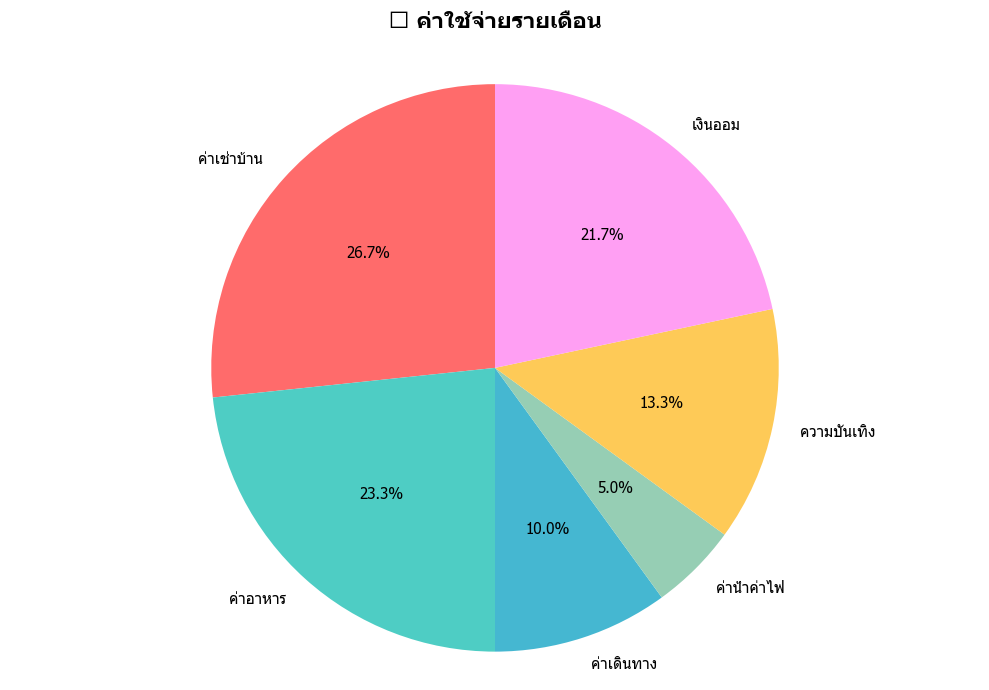

**📊 สร้างกราฟเรียบร้อยแล้วครับ!**

**💰 สรุปค่าใช้จ่ายรายเดือนของคุณ:**

**รายจ่ายทั้งหมด: 30,000 บาท**

**แบ่งตามหมวดหมู่:**

**📌 ค่าใช้จ่ายจำเป็น: 19,500 บาท (65%)**
- ค่าเช่าบ้าน: 8,000 บาท
- ค่าอาหาร: 7,000 บาท
- ค่าเดินทาง: 3,000 บาท
- ค่าน้ำค่าไฟ: 1,500 บาท

**🎉 ค่าใช้จ่ายไม่จำเป็น: 4,000 บาท (13%)**
- ความบันเทิง: 4,000 บาท

**💎 เงินออม: 6,500 บาท (22%)**

---

**✅ การวิเคราะห์:**

**จุดแข็ง:**
- ✨ **ออมได้ 22%** ดีกว่ามาตรฐาน 20% เยี่ยมมาก!
- ควบคุมค่าความบันเทิงได้ดี เพียง 13%

**⚠️ จุดที่ควรปรับปรุง:**
- ค่าใช้จ่ายจำเป็น 65% สูงกว่าที่แนะนำ (50%)
- ค่าเช่าบ้าน 8,000 บาท คิดเป็น 27% ของรายได้ (ควรไม่เกิน 30%)

**💡 คำแนะนำ:**

1. **รักษาระดับการออม** - 6,500 บาท/เดือนดีมากแล้ว ทำต่อไป!

2. **พิจารณาลดค่าใช้จ่าย** (ถ้าต้องการเพิ่มเงินออม):
   - ค่าอาหาร: ลดเหลือ 6,000 บาท (ทำกล่องข้าวบ้าง)
   - ค่าเดินทาง: ลดเหลือ 2,500 บาท (ใช้รถสาธารณะ)
   - ประหยัดได้เพิ่ม 1,500 บาท → ออมรวม 8,000 บาท/เดือน

3. **เป้าหมายระยะยาว:**
   - สร้างกองทุนฉุกเฉิน 90,000-180,000 บาท ภายใน 1-2 ปี
   - ห

In [26]:
# ตัวอย่างข้อมูลค่าใช้จ่ายรายเดือน
monthly_expenses_thai = {
    "ค่าเช่าบ้าน": 8000,
    "ค่าอาหาร": 7000,
    "ค่าเดินทาง": 3000,
    "ค่าน้ำค่าไฟ": 1500,
    "ความบันเทิง": 4000,
    "เงินออม": 6500
}

# ใช้ agent สร้างกราฟ
result = budget_agent_thai_full(
    f"ช่วยสร้างกราฟแสดงค่าใช้จ่ายรายเดือนของฉันด้วย: {monthly_expenses_thai}"
)
print(result)